In [27]:
import json 
import os
from pprint import pprint
import seaborn as sns 
import matplotlib.pyplot as plt

In [50]:
prefix_country = "color_per_country_hexed_"
prefix_country_tag = "best_tag_per_country"
prefix_legend = "color_per_tag_hexed_"
suffix = ""
extension = ".json"


filelist_countries = []
filelist_legend = []
filelist_countries_tag = []

for dirs, subdirs, files in os.walk('../maps_wrong'):
    for file in files : 
        if(prefix_country in file):
            filelist_countries.append(file)
        if(prefix_legend in file):
            filelist_legend.append(file)
        if(prefix_country_tag in file):
            filelist_countries_tag.append(file)
print(filelist_countries_tag)
print(filelist_countries)
print(filelist_legend)

def getDates(filename):
    result = filename.replace(prefix_country, '')
    result = result.replace(suffix+extension, '')
    return(result)

def getTitles(filename):
    result = filename.replace(prefix_country, '')
    result = result.replace(suffix+extension, '')
    if("global" not in result):
        result = " - ".join(result.split("_"))
    return(result)

file_list = [getDates(x) for x in filelist_countries]
file_title = [getTitles(x) for x in filelist_countries]

pprint(file_list)
pprint(file_title)

    

['best_tag_per_country_1920_1950.json', 'best_tag_per_country_1950_1970.json', 'best_tag_per_country_1970_1980.json', 'best_tag_per_country_1980_1990.json', 'best_tag_per_country_1990_2000.json', 'best_tag_per_country_2000_2010.json', 'best_tag_per_country_global.json']
['color_per_country_hexed_1920_1950.json', 'color_per_country_hexed_1950_1970.json', 'color_per_country_hexed_1970_1980.json', 'color_per_country_hexed_1980_1990.json', 'color_per_country_hexed_1990_2000.json', 'color_per_country_hexed_2000_2010.json', 'color_per_country_hexed_global.json']
['color_per_tag_hexed_1920_1950.json', 'color_per_tag_hexed_1950_1970.json', 'color_per_tag_hexed_1970_1980.json', 'color_per_tag_hexed_1980_1990.json', 'color_per_tag_hexed_1990_2000.json', 'color_per_tag_hexed_2000_2010.json', 'color_per_tag_hexed_global.json']
['1920_1950',
 '1950_1970',
 '1970_1980',
 '1980_1990',
 '1990_2000',
 '2000_2010',
 'global']
['1920 - 1950',
 '1950 - 1970',
 '1970 - 1980',
 '1980 - 1990',
 '1990 - 2000'

In [3]:
dataset_list = []
dataset_dict = {}
for index in range(0, len(filelist_countries)):
    country_json = filelist_countries[index]
    legend_json = filelist_legend[index]
    title = file_title[index]
    combo_dict = {"country_json" : country_json,
                 "legend_json" : legend_json,
                 "title" : title}
    dataset_list.append(combo_dict)
#     print(combo_dict)
# pprint(dataset_list)
dataset_dict['data'] = dataset_list
pprint(dataset_dict)
with open("../maps/dataset_index.json", 'w') as fp:
    json.dump(dataset_dict, fp)

{'data': [{'country_json': 'color_per_country_hexed_1920_1950.json',
           'legend_json': 'color_per_tag_hexed_1920_1950.json',
           'title': '1920 - 1950'},
          {'country_json': 'color_per_country_hexed_1950_1970.json',
           'legend_json': 'color_per_tag_hexed_1950_1970.json',
           'title': '1950 - 1970'},
          {'country_json': 'color_per_country_hexed_1970_1980.json',
           'legend_json': 'color_per_tag_hexed_1970_1980.json',
           'title': '1970 - 1980'},
          {'country_json': 'color_per_country_hexed_1980_1990.json',
           'legend_json': 'color_per_tag_hexed_1980_1990.json',
           'title': '1980 - 1990'},
          {'country_json': 'color_per_country_hexed_1990_2000.json',
           'legend_json': 'color_per_tag_hexed_1990_2000.json',
           'title': '1990 - 2000'},
          {'country_json': 'color_per_country_hexed_2000_2010.json',
           'legend_json': 'color_per_tag_hexed_2000_2010.json',
           'title': '2

# Countries and colors

In [4]:
for filename in filelist_countries:
    file_path = '../maps_wrong/' + filename
    file_result = '../maps/' + filename
    file = open(file_path, "r")
    json_content = json.load(file)
    result_dict = {}
    result_list = []
    for key, value in json_content.items():
#         print(key, value)
        temp_dict = {'country' : key,
                    'color' : value}
        result_list.append(temp_dict)
    result_dict['features'] = result_list
    with open(file_result, 'w') as fp:
        json.dump(result_dict, fp)

# Legend

In [9]:
dict_tag = {}
color_list = []

for filename in filelist_legend:
    file_path = '../maps_wrong/' + filename
    file_result = '../maps/' + filename
    file = open(file_path, "r")
    json_content = json.load(file)
    result_dict = {}
    result_list = []
    for key, value in json_content.items():
#         print(key, value)
        temp_dict = {'tag' : key,
                    'color' : value}
        if(key not in dict_tag):
            dict_tag[key] = 1
        else:
            dict_tag[key] += 1
        if(value not in color_list):
            color_list.append(value)
        result_list.append(temp_dict)
    result_dict['features'] = result_list
#     with open(file_result, 'w') as fp:
#         json.dump(result_dict, fp)

In [14]:
sorted(dict_tag.items())

[('00s', 5),
 ('70s', 1),
 ('acoustic', 2),
 ('african', 3),
 ('alternative', 6),
 ('alternative rock', 6),
 ('ambient', 1),
 ('beautiful', 1),
 ('big band', 4),
 ('blues', 2),
 ('blues-rock', 1),
 ('bossa nova', 3),
 ('brazilian pop music', 1),
 ('caribbean', 1),
 ('classic', 2),
 ('classic rock', 1),
 ('composer', 2),
 ('country', 1),
 ('cumbia', 1),
 ('dancehall', 1),
 ('disco', 2),
 ('downtempo', 1),
 ('ebm', 4),
 ('electronic', 5),
 ('electronica', 1),
 ('european', 1),
 ('film music', 1),
 ('folk', 1),
 ('french', 2),
 ('fusion', 1),
 ('garage rock', 2),
 ('german', 5),
 ('german pop', 1),
 ('guitar virtuoso', 3),
 ('hard house', 1),
 ('hardcore', 3),
 ('harmonica blues', 1),
 ('house', 1),
 ('instrumental', 1),
 ('intelligent dance music', 1),
 ('island music', 1),
 ('jazz', 4),
 ('jazz rock', 2),
 ('latin', 5),
 ('latin pop', 3),
 ('latino', 2),
 ('melodic', 2),
 ('metal', 2),
 ('mondiovision', 2),
 ('new wave', 5),
 ('oldies', 1),
 ('pop', 6),
 ('pop rap', 2),
 ('praise & wors

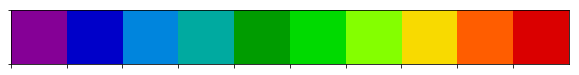

['#850096', '#0000c9', '#0085dd', '#00aaa0', '#009c00', '#00da00', '#84ff00', '#f8da00', '#ff5d00', '#da0000']


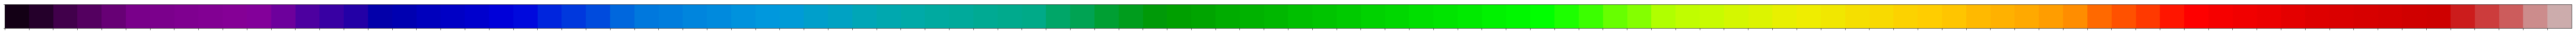

In [59]:
palette_10 = sns.color_palette("nipy_spectral", 10).as_hex()
palette_global = sns.color_palette("nipy_spectral", 106).as_hex()

# palette = sns.color_palette("nipy_spectral", 45).as_hex()
sns.palplot(palette_10)
plt.show()
print(palette_10.as_hex())
sns.palplot(palette_global)
plt.show()

In [49]:
palette_10 = sns.color_palette("nipy_spectral", 10).as_hex()
palette_global = sns.color_palette("nipy_spectral", 90).as_hex()

list_dict_tag = []
list_color_legend = []
list_dict_tag_rest = []

i = 0
for key, value in dict_tag.items():
    list_dict_tag.append({'tag' : key,
                         'count' : value 
                          })
    if(value >= 5):
        list_color_legend.append({'tag': key,
                                 'color': palette_10[i]})
        i += 1
    else:
        list_dict_tag_rest.append({'tag' : key,
                     'count' : value 
                      })


# pprint(list_color_legend)
# sorted_list_dict_tag = sorted(list_dict_tag, key=lambda k: k['count'], reverse = True) 
# print(len(sorted_list_dict_tag))
# pprint(sorted_list_dict_tag)
# pprint(list_dict_tag_rest)
for tag_data in list_dict_tag_rest:
    tag = tag_data['tag']
    potential_color = palette_global.pop()
    while(potential_color in palette_10):
        print("retry color")
        potential_color = palette_global.pop()
    list_color_legend.append({'tag' : tag, 
                             'color' : potential_color})
pprint(list_color_legend)

[{'color': '#850096', 'tag': 'soul'},
 {'color': '#0000c9', 'tag': 'alternative rock'},
 {'color': '#0085dd', 'tag': 'latin'},
 {'color': '#00aaa0', 'tag': 'german'},
 {'color': '#009c00', 'tag': 'new wave'},
 {'color': '#00da00', 'tag': 'pop'},
 {'color': '#84ff00', 'tag': 'rock'},
 {'color': '#f8da00', 'tag': 'alternative'},
 {'color': '#ff5d00', 'tag': '00s'},
 {'color': '#da0000', 'tag': 'electronic'},
 {'color': '#ccacac', 'tag': 'blues'},
 {'color': '#cc7c7c', 'tag': 'big band'},
 {'color': '#cc4c4c', 'tag': 'classic'},
 {'color': '#cc1c1c', 'tag': 'guitar virtuoso'},
 {'color': '#ce0000', 'tag': 'composer'},
 {'color': '#d00000', 'tag': 'smooth jazz'},
 {'color': '#d40000', 'tag': 'jazz'},
 {'color': '#d80000', 'tag': 'latin pop'},
 {'color': '#dc0000', 'tag': 'mondiovision'},
 {'color': '#e40000', 'tag': 'psychedelic rock'},
 {'color': '#e90000', 'tag': 'vocal'},
 {'color': '#f10000', 'tag': 'sexy'},
 {'color': '#f90000', 'tag': 'folk'},
 {'color': '#ff0900', 'tag': 'southern s

## Create lookup table for color

In [53]:
color_lookup_table = {}
for tag_data in list_color_legend:
    color_lookup_table[tag_data['tag']] = tag_data['color']
# color_lookup_table    

In [7]:
filelist_legend

['color_per_tag_hexed_1920_1950.json',
 'color_per_tag_hexed_1950_1970.json',
 'color_per_tag_hexed_1970_1980.json',
 'color_per_tag_hexed_1980_1990.json',
 'color_per_tag_hexed_1990_2000.json',
 'color_per_tag_hexed_2000_2010.json',
 'color_per_tag_hexed_global.json']

In [6]:
pprint(len(color_list))

80


# Load best tag per country and change with new colors 

In [58]:
list_tag_new = []

for filename in filelist_countries_tag:
    file_path = '../maps_wrong/' + filename
    file_result = '../maps/' + filename
    file = open(file_path, "r")
    json_content = json.load(file)
    result_dict = {}
    result_list = []
    for key, value in json_content.items():
#         print(key, value)
        if(value not in list_tag_new):
            list_tag_new.append(value)
        temp_dict = {'country' : key,
                    'color' : value}
        result_list.append(temp_dict)
    result_dict['features'] = result_list
#     pprint(result_dict)
#     with open(file_result, 'w') as fp:
#         json.dump(result_dict, fp)
print(len(list_tag_new))

96


# Load legend files and change with new colors 